In [39]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

In [40]:
def draw_plot(xs: np.ndarray, f: Callable, k: int = 1) -> None:

  # Draw 2 plots:
  # On the left subplot, show:
  # - the function f(x) as contours 
  # - the values of x as we search for the minimizer
  # On the right subplot, show:
  # - value of f(x) vs. current xi at each iteration of the optimization

  plt.subplots(1, 2)

  plt.subplot(1, 2, 2)
  z = f(xs,k=k)
  plt.plot(np.arange(len(z)), z)
  plt.xlabel('Iteration')
  plt.ylabel('f(x)')
  plt.gca().set_yscale('log')

  plt.subplot(1, 2, 1)

  # Optimization
  plt.plot(xs[:, 0], xs[:, 1], '-x')

  x_low = -2
  x_high = 2
  y_low = -2
  y_high = 2

  # Contour Plot
  num_xs = 20
  num_ys = 20
  x_vals = np.linspace(x_low, x_high, num_xs)
  y_vals = np.linspace(y_low, y_high, num_ys)
  X, Y = np.meshgrid(x_vals, y_vals)
  xy_pairs = np.vstack([X.ravel(), Y.ravel()]).T
  z = f(xy_pairs, k=k)
  Z = z.reshape(num_xs, num_ys)
  plt.gca().contour(X, Y, Z)

  plt.xlim([x_low, x_high])
  plt.ylim([y_low, y_high])
  plt.show()

In [41]:
def f(x: np.ndarray, k: int = 1) -> float:
  # f(x) = x^2 - xy + ky^2
  if x.ndim == 1:
    return x[0]**2 - x[0]*x[1] + k*x[1]**2
  elif x.ndim == 2:
    return x[:, 0]**2 - x[:, 0]*x[:, 1] + k*x[:, 1]**2

# 1.1 [2pts] Implement the gradient and hessian of f(x; k)

In [42]:
def gradf(x: np.ndarray, k: int = 1) -> np.ndarray:
  #raise NotImplementedError
  if x.ndim == 1:
    gradx = 2*x[0]-x[1]
    grady = -x[0]+2*k*x[1]
  elif x.ndim == 2 :
    gradx = 2*x[:,0]-x[:,1]
    grady = -x[:,0]+2*k*x[:,1] 
  return np.array([gradx,grady])
  

def hessf(x: np.ndarray, k: int = 1) -> np.ndarray:
  #raise NotImplementedError
  return np.array([[2 ,-1 ], [-1,2*k]])

# 1.2 [2pts] Implement Gradient Descent

In [43]:
from numpy import linalg as LA
def gradient_descent(
    f: Callable,
    gradf: Callable,
    x0: np.ndarray,
    c: float,
    tau: float,
    epsilon: float,
    plot: bool = False,
    k: int = 1,
    ) -> np.ndarray:
  #xs = np.array(x0)  
  xs = [x0]    # List that stores values of each successive iteration. Initial guess stored#
  xi = x0

  while LA.norm(gradf(xi,k)) > epsilon :
    p = -gradf(xi,k)
 
    alpha = 1

    while f(xi + alpha*p,k)> f(xi,k) - c*alpha*(LA.norm(p))**2 :
      alpha = tau*alpha
      #print(alpha)
    xi = xi + alpha*p
    xs.append(xi)
  xs = np.array(xs)   
  if plot:
    draw_plot(xs, f, k=k)
  return xs

## 1.2 [1pt] Run your gradient descent for various values of $\kappa$

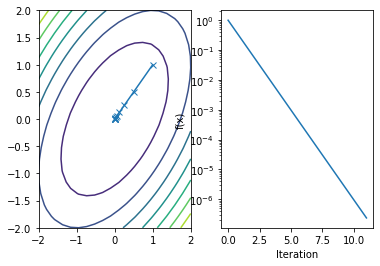

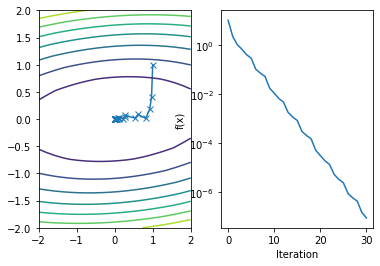

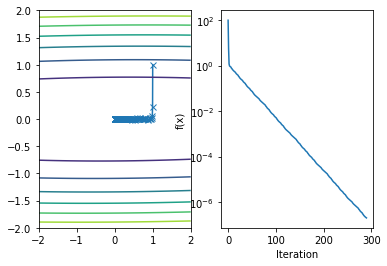

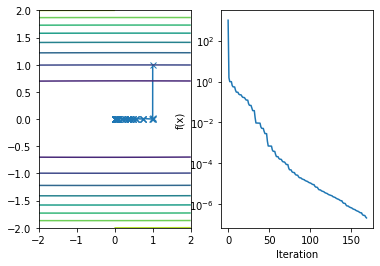

In [44]:
x0 = np.array([1., 1.])
c = 0.5
tau = 0.5
epsilon = 0.001
xs = gradient_descent(f, gradf, x0, c, tau, epsilon, k=1, plot=True)
xs = gradient_descent(f, gradf, x0, c, tau, epsilon, k=10, plot=True)
xs = gradient_descent(f, gradf, x0, c, tau, epsilon, k=100, plot=True)
xs = gradient_descent(f, gradf, x0, c, tau, epsilon, k=1000, plot=True)



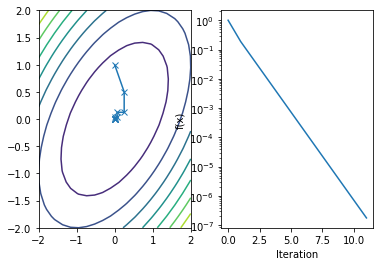

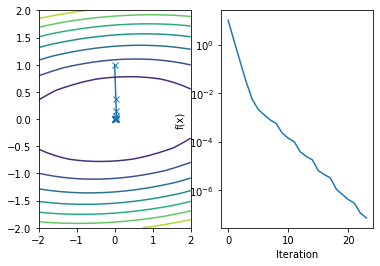

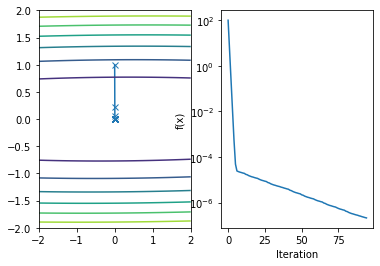

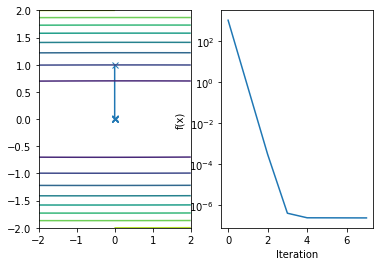

In [45]:
# Taking a starting point such that the resulting path is perpendicular to the contours results in fast convergence. 
xs = gradient_descent(f, gradf, np.array([0., 1.]), c, tau, epsilon, k=1, plot=True)
xs = gradient_descent(f, gradf, np.array([0., 1.]), c, tau, epsilon, k=10, plot=True)
xs = gradient_descent(f, gradf, np.array([0., 1.]), c, tau, epsilon, k=100, plot=True)
xs = gradient_descent(f, gradf, np.array([0., 1.]), c, tau, epsilon, k=1000, plot=True)

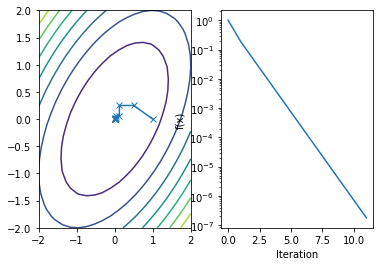

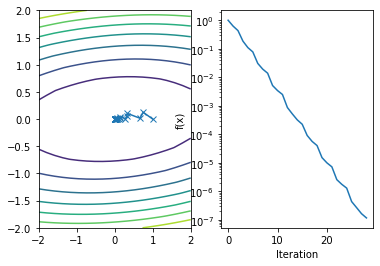

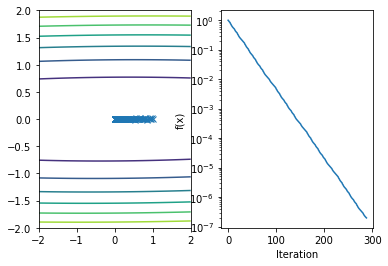

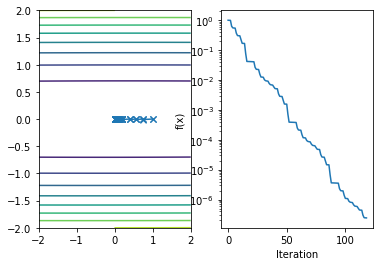

In [46]:
# Taking a point such that resulting path is "along" the contours results in extremely sluggish convergence for higher k. 
xs = gradient_descent(f, gradf, np.array([1., 0.]), c, tau, epsilon, k=1, plot=True)
xs = gradient_descent(f, gradf, np.array([1., 0.]), c, tau, epsilon, k=10, plot=True)
xs = gradient_descent(f, gradf, np.array([1., 0.]), c, tau, epsilon, k=100, plot=True)
xs = gradient_descent(f, gradf, np.array([1., 0.]), c, tau, epsilon, k=1000, plot=True)

For full credit on this problem, add some text description of what you observe about these results and why that is occurring (replace this text cell with your own thoughts).

# 1.4 [2pts] Implement Newton's Method

In [47]:
def newton(
    f: Callable,
    gradf: Callable,
    hessf: Callable,
    x0: np.ndarray,
    epsilon: float,
    plot: bool = False,
    k: int = 1
    ) -> np.ndarray:
  xs = [x0]
  xi = x0
  print(xi)
  #raise NotImplementedError
  while LA.norm(gradf(xi,k)) > epsilon :
    grad = gradf(xi,k)
    grad2 = hessf(xi,k)
    grad = np.array([grad])  # Converting gradient into a 2-D array. Only a 2-D can be transposed. 
    hn = np.matmul(-LA.inv(grad2),grad.T)
    Hn = np.array([hn[0,0],hn[1,0]])
    print("Step")
    print(Hn)
    xi = xi + Hn
    xs.append(xi)
  xs = np.array(xs)
  if plot:
     draw_plot(xs, f, k=k)
  return xs

## 1.5 [1pt] Run your Newton's method for various values of $\kappa$

[1. 1.]
Step
[-1. -1.]


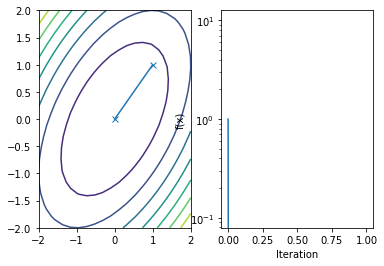

[1. 1.]
Step
[-1. -1.]


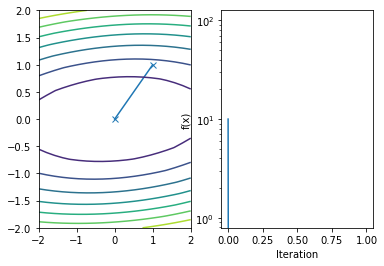

[1. 1.]
Step
[-1. -1.]


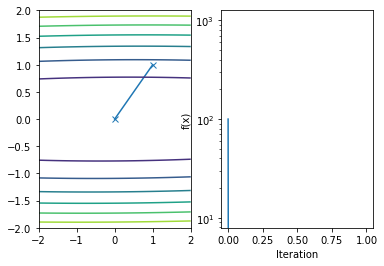

[1. 1.]
Step
[-1. -1.]


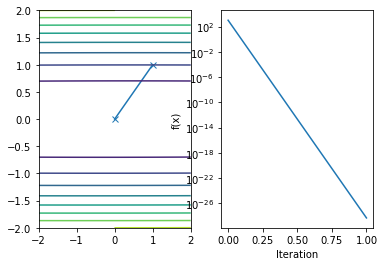

In [48]:
x0 = np.array([1., 1.])
epsilon = 0.001
xs = newton(f, gradf, hessf, x0, epsilon, k=1, plot=True)
xs = newton(f, gradf, hessf, x0, epsilon, k=10, plot=True)
xs = newton(f, gradf, hessf, x0, epsilon, k=100, plot=True)
xs = newton(f, gradf, hessf, x0, epsilon, k=1000, plot=True)

[76.55066288 39.68200819]
Step
[-76.55066288 -39.68200819]


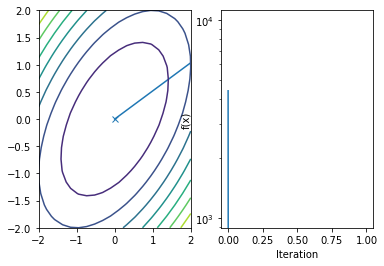

[96.11295539 22.72278611]
Step
[-96.11295539 -22.72278611]


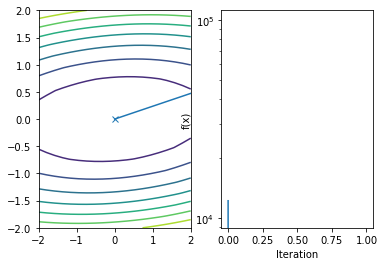

[28.00624544 36.55750286]
Step
[-28.00624544 -36.55750286]


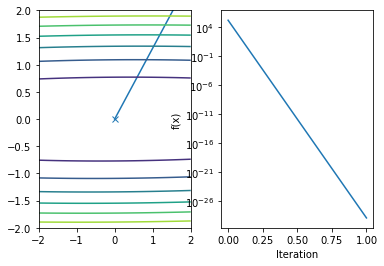

[ 6.50307917 69.05596288]
Step
[ -6.50307917 -69.05596288]


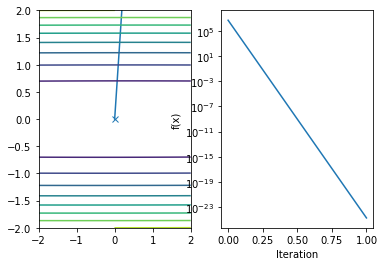

In [49]:
# Illustrating how Newton's method converges in 1 step for this function irrespective of contour and starting point. \
# Starting point chosen randomly between 0 - 100 for both coordinates
import random

xs = newton(f, gradf, hessf, np.array([100*random.random(), 100*random.random()]), epsilon, k=1, plot=True)
xs = newton(f, gradf, hessf, np.array([100*random.random(), 100*random.random()]), epsilon, k=10, plot=True)
xs = newton(f, gradf, hessf, np.array([100*random.random(), 100*random.random()]), epsilon, k=100, plot=True)
xs = newton(f, gradf, hessf, np.array([100*random.random(), 100*random.random()]), epsilon, k=1000, plot=True)


**NEWTON'S METHOD**
The most stark observation I can see is the following - **It takes exactly 1 iteration for Newton's method no matter the start point or the k value. **
We approximate the function as a model function m(h) which is second order Taylor series of the function and then optimize for h locally by finding its minima. 

However, in this case, the function f is second order, and we are finding the minima of its second order approximation. Thus, we finding the minima of the exact function not the modal function. Essentially, we find h that minimizes the function GLOBALLY and not locally. Hence, we always reach the optimum in one step. 

Also, since log(0) is -infinity, we sometimes see 0 iterations, because, the log of the final value of the function reached is SO SMALL that it approaches negative infinity on the log scale and we see an almost straight line. This happens because the solution is reached in one step. 


**GRADIENT DESCENT**
As is expected, the performance declines as the curvature of the function flattens. The performance depends heavily on the direction of the derivative. We observe that algorithm traverses the vertical direction quickly owing to the steep contour, but takes a long time to converge on the minima thereafter. 

This is made evident for k =1000, when I chose the initially point (0,1) and it converged in 7 iterations, whereas when I chose the initial point as (1,1) it needed 160 iterations to converge. However, repeating the same for k = 1, yields no difference(10 iterations for both) because the function's derivatives has no direction dependence.  



